In [67]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv('imports-85.data', header=None)[[5, 10, 11]].rename(
    columns={5: 'num-of-doors', 10: 'length', 11: 'width'})

In [ ]:
data

,num-of-doors,length,width
0,two,168.8,64.1
1,two,168.8,64.1
2,two,171.2,65.5
3,four,176.6,66.2
4,four,176.6,66.4
...,...,...,...
200,four,188.8,68.9
201,four,188.8,68.8
202,four,188.8,68.9
203,four,188.8,68.9


In [70]:
kmeans = KMeans(n_clusters=2, init="k-means++").fit(data[['length', 'width']])
data['cluster'] = kmeans.labels_
data

,num-of-doors,length,width,cluster
0,two,168.8,64.1,0
1,two,168.8,64.1,0
2,two,171.2,65.5,0
3,four,176.6,66.2,0
4,four,176.6,66.4,0
...,...,...,...,...
200,four,188.8,68.9,1
201,four,188.8,68.8,1
202,four,188.8,68.9,1
203,four,188.8,68.9,1


Text(0.5, 1.0, 'Кластеризация по классам (two, four)')

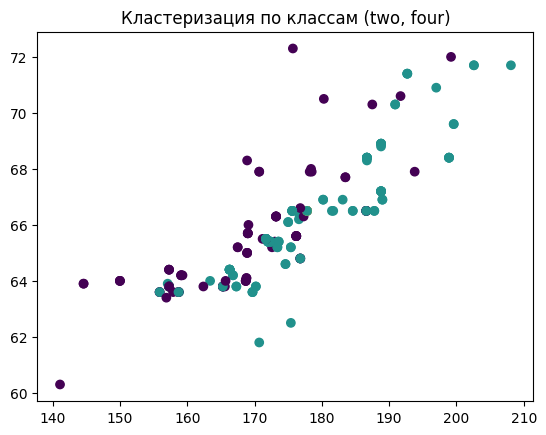

In [71]:
plt.scatter('length', 'width', data=data,
            c=[0 if i == 'two' else 1 if i == 'four' else 2 for i in data['num-of-doors'].values])
plt.title('Кластеризация по классам (two, four)')

Text(0.5, 1.0, 'Кластеризация методом k-mean с центрами (x)')

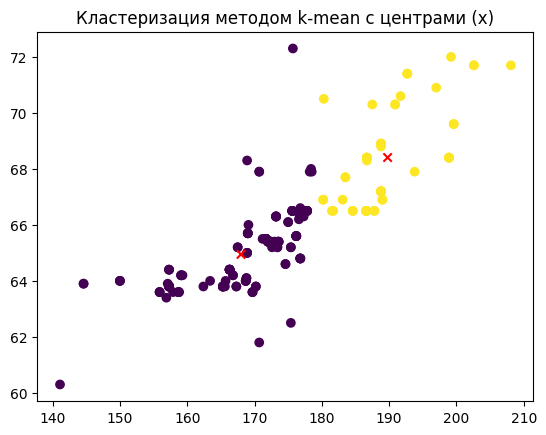

In [72]:
plt.scatter('length', 'width', data=data,
            c=data['cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c=['red', 'red'], marker='x', )
plt.title('Кластеризация методом k-mean с центрами (x)')

In [73]:
data['sqrt_distances'] = data.apply(lambda x: ((kmeans.cluster_centers_[0,0] - x['length']) ** 2 + (kmeans.cluster_centers_[0,1] - x['width']) ** 2) ** 0.5  if x['cluster'] == 0 else ((kmeans.cluster_centers_[1,0] - x['length']) ** 2 + (kmeans.cluster_centers_[1,1] - x['width']) ** 2) ** 0.5, 1)
data

,num-of-doors,length,width,cluster,sqrt_distances
0,two,168.8,64.1,0,1.169899
1,two,168.8,64.1,0,1.169899
2,two,171.2,65.5,0,3.255600
3,four,176.6,66.2,0,8.698976
4,four,176.6,66.4,0,8.730051
...,...,...,...,...,...
200,four,188.8,68.9,1,1.095295
201,four,188.8,68.8,1,1.053909
202,four,188.8,68.9,1,1.095295
203,four,188.8,68.9,1,1.095295
